In [3]:
# Importing dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime as dt

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
# Creating engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# Inspecting data
insp = inspect(engine)
insp.get_table_names()

['measurement', 'station']

In [14]:
# Inspecting data 
columns = insp.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Inspecting data 
columns = insp.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# looking at first 10 rows 
engine.execute('SELECT * FROM  measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [19]:
# looking at first 10 rows 
engine.execute('SELECT * FROM  station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [42]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement_station = Base.classes.measurement

In [22]:
# Start a session to query the database
session = Session(engine)

In [43]:
# how many dates are there 
session.query(func.count(measurement.date)).all()

[(19550)]

In [24]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [44]:
# Finding the first data 
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [45]:
# Finding the latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [93]:
yearly = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date < '2017-08-24').\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()


yearly

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [94]:
# Checking to make sure first and last days are expected 
print(yearly[-1])

('2017-08-23', 0.45)


In [95]:
# Checking to make sure first and last days are expected 
print(yearly[0])

('2016-08-23', 0.0)


In [163]:
# Loading data into dataframe 
yearly_df = pd.DataFrame(yearly, columns =['date', 'precipitation'])

yearly_df 


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [164]:
# dropped all rows with NaN values 
clean_yearly = yearly_df.dropna(how='any')
clean_yearly

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [165]:
# checking number of unique dates so after the adding of seperate precipitation records is complete we can verify there is the correct number of days. 
clean_yearly.nunique()

date             366
precipitation    160
dtype: int64

In [166]:
# grouping by date and adding the precipitation logs that are recorded on the same day producing a cumulative log of precipitation for each day. 

sum_yearly_by_date = clean_yearly.groupby('date')['precipitation'].sum()
sum_yearly_by_date

date
2016-08-23    2.71
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Name: precipitation, Length: 366, dtype: float64

In [167]:
#Resetting index so we can set index to date column value
reset_yearly = sum_yearly_by_date.reset_index()

reset_yearly

,date,precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


In [168]:
# Setting index to date column 

yearly_indexed_by_date = reset_yearly.set_index('date')
yearly_indexed_by_date

,precipitation
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


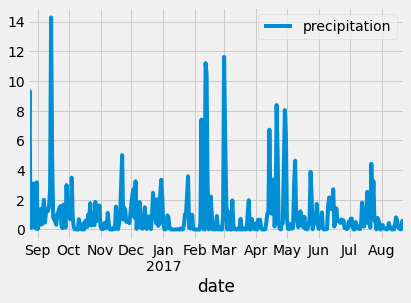

In [189]:
# Plot the results of daily precipitation

reset_yearly.date = pd.to_datetime(reset_yearly.date)
reset_yearly.plot(x = 'date', y = 'precipitation')



In [172]:
# summary statistics for the precipitation data.
yearly_indexed_by_date['precipitation'].describe()

count    366.000000
mean       0.978907
std        1.776349
min        0.000000
25%        0.052500
50%        0.405000
75%        1.087500
max       14.280000
Name: precipitation, dtype: float64

In [196]:
#######################
#Station Analysis
######################

# Calculating the total number of stations.
stations = session.query(station.name).order_by(station.name).all()
station_count = len(stations)
print(f'There are {station_count} stations')

There are 9 stations
